In [2]:
#packages importation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model, load_model
import tensorflow as tf
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [3]:
#create a np.array from the images
path = "C:/Users/Emma Molière/Documents/insa/4BIM/Software development/project/2000faces/"

imgs = []
for filemname in os.listdir(path):
    img = image.load_img(path+filemname, target_size = (128,128)) #resize to 128*128
    imgs.append(image.img_to_array(img))
imgs = np.array(imgs)

#imgs.shape

In [4]:
#split the data in train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(imgs, test_size=0.2, random_state=0)
print(X_train.shape)

(1600, 128, 128, 3)


In [5]:
#visualize data
def show_faces_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)


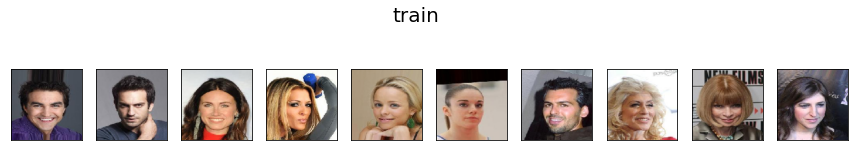

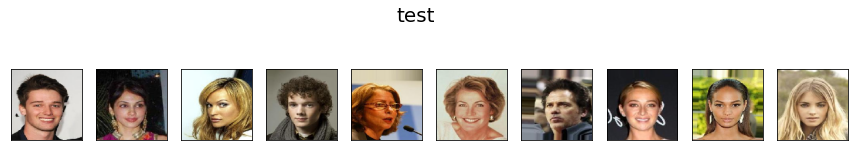

In [6]:
show_faces_data(X_train, title="train")
show_faces_data(X_test, title="test")
plt.show()

### Max pooling : 
used to reduce the spatial dimensions of the output volume.
=> downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size, here (2,2)) for each channel of the input.
### Conv2D :
first parameter : number of filters (number of kernels to convolve with the input volume. Each of these operations produces a 2D activation map)
then : filter_size : ex (3,3)
### Conv2DTranspose : 
Deconvolution

In [7]:
#Model definition
input_layer = Input(shape=(128, 128, 3), name="INPUT") #encoder's input
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [8]:
code_layer = MaxPooling2D((2, 2), name="CODE")(x)
input_layer_deco = Input(shape=(16, 16, 8), name ="INPUT") #decoder's input

In [9]:
#deconvolution layers applied to the encoder and decoder variables

lay1 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
x = lay1(code_layer)
#x_deco = lay1(input_layer_deco)

x = UpSampling2D((2, 2))(x)
#x_deco = UpSampling2D((2, 2))(x_deco)

lay2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
x = lay2(x)
#x_deco = lay2(x_deco)

x = UpSampling2D((2, 2))(x)
#x_deco = UpSampling2D((2, 2))(x_deco)

lay3 = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')
x = lay3(x)
#x_deco = lay3(x_deco)

x = UpSampling2D((2,2))(x)
#x_deco = UpSampling2D((2, 2))(x_deco)

lay4 = Conv2D(3, (3, 3), padding='same', name="OUTPUT")
output_layer = lay4(x)
#output_layer_deco = lay4(x_deco)


#refaire les couches en suivant le tuto sergio (autoencoder, encoder, decoder)

In [10]:
#autoencoder's model
faces_AE = Model(input_layer, output_layer)
faces_AE.compile(optimizer='adam', loss='mse')


#decoder's model
#faces_AE_deco = Model(input_layer_deco, output_layer_deco)
#faces_AE_deco.compile(optimizer='adam', loss='mse')
#faces_AE_deco.summary()

In [11]:
#decoder's model
hidden_decoder_layer_d = faces_AE.layers[-7]
hidden_decoder_layer_c = faces_AE.layers[-6]
hidden_decoder_layer_b = faces_AE.layers[-5]
hidden_decoder_layer_a = faces_AE.layers[-4]
hidden_decoder_layer = faces_AE.layers[-3]
hidden_dropout_decoded_layer = faces_AE.layers[-2]
decoder_layer = faces_AE.layers[-1]


In [12]:
faces_decoder = Model(input_layer_deco,decoder_layer(hidden_dropout_decoded_layer(hidden_decoder_layer(hidden_decoder_layer_a(hidden_decoder_layer_b(hidden_decoder_layer_c(hidden_decoder_layer_d(input_layer_deco))))))))
faces_decoder.compile(optimizer='adam', loss='mse')

In [13]:
faces_AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584   

In [21]:
faces_AE.fit(X_train, X_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
50/50 [==============================] - 40s 795ms/step - loss: 664.2441 - val_loss: 648.7557
Epoch 2/10
50/50 [==============================] - 38s 766ms/step - loss: 648.3240 - val_loss: 640.7844
Epoch 3/10
50/50 [==============================] - 39s 773ms/step - loss: 635.0155 - val_loss: 623.8528
Epoch 4/10
50/50 [==============================] - 40s 793ms/step - loss: 621.4411 - val_loss: 612.9001
Epoch 5/10
50/50 [==============================] - 40s 796ms/step - loss: 610.3284 - val_loss: 600.4744
Epoch 6/10
50/50 [==============================] - 39s 787ms/step - loss: 600.0460 - val_loss: 597.2411
Epoch 7/10
50/50 [==============================] - 40s 793ms/step - loss: 590.3757 - val_loss: 583.8306
Epoch 8/10
50/50 [==============================] - 39s 789ms/step - loss: 580.9351 - val_loss: 577.5376
Epoch 9/10
50/50 [==============================] - 39s 776ms/step - loss: 574.6046 - val_loss: 569.2424
Epoch 10/10
50/50 [==============================] - 40

In [22]:
#Save models
faces_AE.save("C:/Users/Emma Molière/Documents/insa/4BIM/Software development/project/Projet_SD/faces_AE.h5")
faces_decoder.save("C:/Users/Emma Molière/Documents/insa/4BIM/Software development/project/Projet_SD/faces_decod.h5")

In [23]:
#Make a model to get the encoded representation (i.e. intermediate layer output) of a given face picture

get_encoded_face = Model(inputs=faces_AE.input, outputs=faces_AE.get_layer("CODE").output)

In [24]:
#Get encoded faces
encoded_face = get_encoded_face.predict(X_test)
#we convert into a linear vector to make it easier to manage by the genetic algorithm
encoded_face = encoded_face.reshape((len(X_test), 16*16*8))
np.savetxt("C:/Users/Emma Molière/Documents/insa/4BIM/Software development/project/Projet_SD/encoded_faces.txt", encoded_face)


In [25]:
encoded_face.shape

(400, 2048)

In [26]:
#Reconstructed faces
reconstructed_faces = faces_AE.predict(X_test)

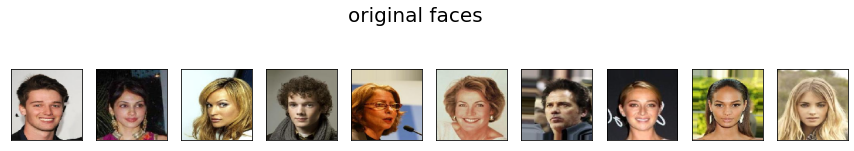

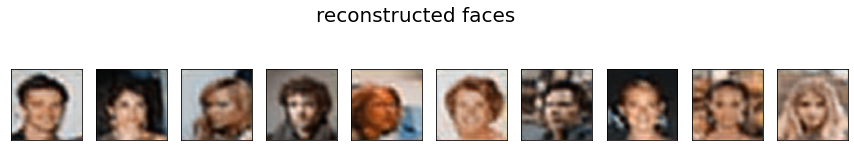

In [27]:
#Visualize the results on test set
show_faces_data(X_test, title="original faces")
#show_faces_data(encoded_face, height=32, width=64, title="encoded faces")
show_faces_data(reconstructed_faces, title="reconstructed faces") 

# DECODER 

#Decoder of a given (16* 16* 8) vector ; NOT LINEAR
input_layer_deco = Input(shape=(16, 16, 8), name="INPUT")
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(input_layer_deco)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer_deco = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

faces_AE_deco = Model(input_layer_deco, output_layer_deco)
faces_AE_deco.compile(optimizer='adam', loss='mse')
faces_AE_deco.summary()

#Save decoder 
faces_AE_deco.save("C:/Users/Emma Molière/Documents/insa/4BIM/Software development/project/Projet_SD/faces_decod.h5")

In [28]:
#load the model
decoder = load_model('faces_decod.h5')
#load the encoded vector (numpy.ndarray format)



In [29]:
#loading the txt file with encoded vectors into a np array
encoded_faces_0 = np.loadtxt("C:/Users/Emma Molière/Documents/insa/4BIM/Software development/project/Projet_SD/encoded_faces.txt")


In [30]:
#Reshape the linear vectors into a 16*16*8 dimensuin
encoded_faces = encoded_faces_0.reshape(400, 16, 16, 8)


In [31]:
#Decode on of them using the decoder model we implemented
decoded_faces  = decoder.predict(encoded_faces)

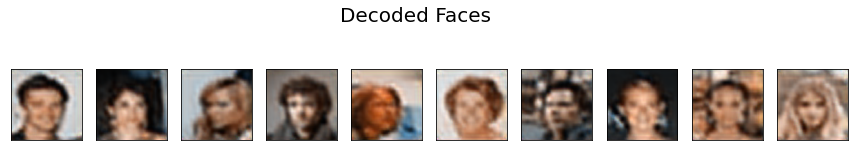

In [32]:
show_faces_data(decoded_faces, title="Decoded Faces")